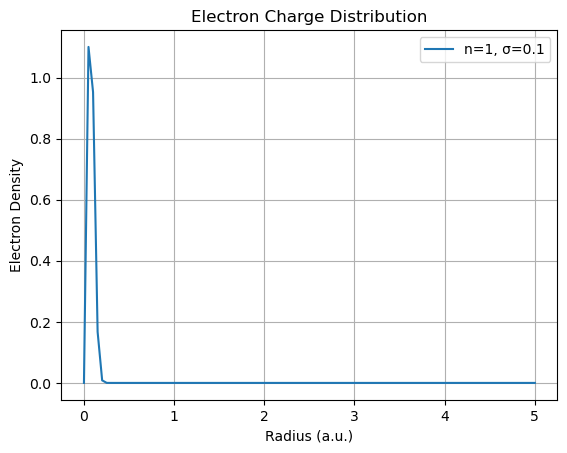

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters for the atom and electron distribution
n = 1  # Principal quantum number
sigma = 0.1  # Standard deviation of the Gaussian distribution
r_max = 5.0  # Maximum radius

# Create a range of radii
r = np.linspace(0, r_max, 100)

# Calculate the electron density using a Gaussian distribution
electron_density = 4 * (1 / (np.sqrt(np.pi) * sigma) ** 3) * np.exp(-2 * r ** 2 / (sigma ** 2)) * r ** 2

# Plot the charge distribution
plt.plot(r, electron_density, label=f'n={n}, σ={sigma}')
plt.xlabel('Radius (a.u.)')
plt.ylabel('Electron Density')
plt.title('Electron Charge Distribution')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
!pip install matplotlib numpy


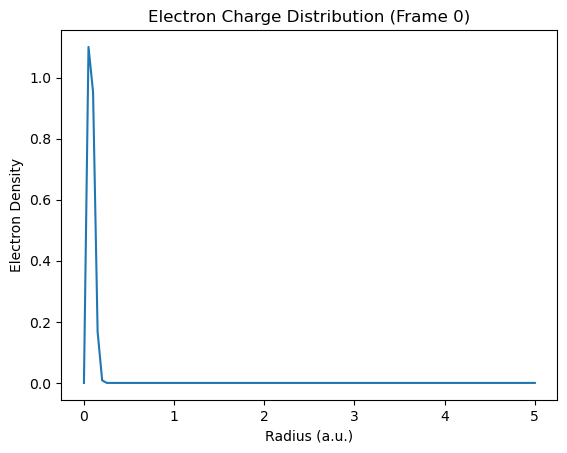

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Parameters for the atom and electron distribution
n = 1
sigma = 0.1
r_max = 5.0

# Create a range of radii
r = np.linspace(0, r_max, 100)

# Initialize the figure and axis for the animation
fig, ax = plt.subplots()
ax.set_xlim(0, r_max)
ax.set_ylim(0, 0.2)  # Adjust the y-axis limit as needed

# Function to update the plot at each animation frame
def update(frame):
    ax.clear()
    electron_density = (
        4 * (1 / (np.sqrt(np.pi) * sigma) ** 3) * np.exp(-2 * (r ** 2) / (sigma ** 2)) * (r ** 2)
    )
    ax.plot(r, electron_density, label=f'n={n}, σ={sigma}')
    ax.set_xlabel('Radius (a.u.)')
    ax.set_ylabel('Electron Density')
    ax.set_title(f'Electron Charge Distribution (Frame {frame})')

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=100, interval=100)

# Display the animation in the Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())  # This creates an HTML5 video of the animation


In [4]:
!pip install pygame


     --------------------------------------- 10.8/10.8 MB 14.2 MB/s eta 0:00:00


In [5]:
import pygame
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Initialize Pygame
pygame.init()

# Constants
SCREEN_WIDTH = 800
SCREEN_HEIGHT = 600
PARTICLE_COUNT = 100

# Colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)

# Create the screen
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
pygame.display.set_caption("Particle Simulation")

# Particle class
class Particle:
    def __init__(self):
        self.x = random.randint(0, SCREEN_WIDTH)
        self.y = random.randint(0, SCREEN_HEIGHT)
        self.vx = random.uniform(-1, 1)
        self.vy = random.uniform(-1, 1)
        self.radius = random.randint(2, 5)

    def move(self):
        self.x += self.vx
        self.y += self.vy

        # Wrap around the screen
        if self.x < 0:
            self.x = SCREEN_WIDTH
        elif self.x > SCREEN_WIDTH:
            self.x = 0
        if self.y < 0:
            self.y = SCREEN_HEIGHT
        elif self.y > SCREEN_HEIGHT:
            self.y = 0

    def draw(self):
        pygame.draw.circle(screen, WHITE, (int(self.x), int(self.y)), self.radius)

# Create particles
particles = [Particle() for _ in range(PARTICLE_COUNT)]

# Main loop
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    screen.fill(BLACK)

    for particle in particles:
        particle.move()
        particle.draw()

    pygame.display.flip()
    pygame.time.delay(10)  # Delay to control the simulation speed

    # Uncomment the following lines if you want to display the simulation in Jupyter Notebook
    # plt.imshow(pygame.surfarray.array3d(screen))
    # plt.axis('off')
    # plt.show()
    # clear_output(wait=True)

# Quit Pygame
pygame.quit()


pygame 2.5.2 (SDL 2.28.3, Python 3.10.9)
Hello from the pygame community. https://www.pygame.org/contribute.html



KeyboardInterrupt



C:\Users\jarc5624\AppData\Local\Temp\ipykernel_13152\2323585375.py:30: RuntimeWarning: overflow encountered in multiply
  populations = (1.0 - 1.0 / viscosity) * populations + 1.0 / viscosity * feq
C:\Users\jarc5624\AppData\Local\Temp\ipykernel_13152\2323585375.py:38: RuntimeWarning: invalid value encountered in divide
  ux = np.sum(populations * ex, axis=2) / rho
C:\Users\jarc5624\AppData\Local\Temp\ipykernel_13152\2323585375.py:39: RuntimeWarning: invalid value encountered in multiply
  uy = np.sum(populations * ey, axis=2) / rho
C:\Users\jarc5624\AppData\Local\Temp\ipykernel_13152\2323585375.py:28: RuntimeWarning: overflow encountered in multiply
  feq[:, :, k] = weights[k] * rho * (1.0 + cu + 0.5 * cu**2 - 1.5 * (ux**2 + uy**2))
C:\Users\jarc5624\AppData\Local\Temp\ipykernel_13152\2323585375.py:30: RuntimeWarning: invalid value encountered in add
  populations = (1.0 - 1.0 / viscosity) * populations + 1.0 / viscosity * feq
C:\ProgramData\anaconda3\lib\site-packages\numpy\core\fromn

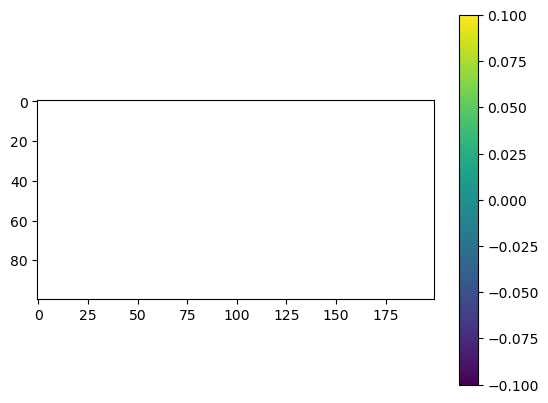

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
width, height = 200, 100  # Size of the simulation grid
viscosity = 0.1  # Viscosity coefficient
density = 1.0  # Initial density

# Lattice velocities (D2Q9 lattice)
ex = np.array([1, 1, 0, -1, -1, -1, 0, 1, 0])
ey = np.array([0, 1, 1, 1, 0, -1, -1, -1, 0])
weights = np.array([1/9, 1/36, 1/9, 1/36, 4/9, 1/36, 1/9, 1/36, 4/9])

# Initialize populations
populations = np.zeros((width, height, 9))

# Initialize the macroscopic variables (density and velocity)
rho = np.ones((width, height)) * density
ux = np.zeros((width, height))
uy = np.zeros((width, height))

# Main time loop
for _ in range(1000):  # Adjust the number of iterations as needed
    # Collision step - LBM
    feq = np.zeros((width, height, 9))
    for k in range(9):
        cu = 3.0 * (ex[k] * ux + ey[k] * uy)
        feq[:, :, k] = weights[k] * rho * (1.0 + cu + 0.5 * cu**2 - 1.5 * (ux**2 + uy**2))

    populations = (1.0 - 1.0 / viscosity) * populations + 1.0 / viscosity * feq

    # Streaming step
    for k in range(9):
        populations[:, :, k] = np.roll(populations[:, :, k], (ex[k], ey[k]), axis=(0, 1))

    # Update macroscopic variables
    rho = np.sum(populations, axis=2)
    ux = np.sum(populations * ex, axis=2) / rho
    uy = np.sum(populations * ey, axis=2) / rho

    # Boundary conditions (for simplicity, a lid-driven cavity)
    ux[:, -1] = 0.1  # Lid velocity

# Visualization
plt.imshow(np.sqrt(ux**2 + uy**2).T, cmap='viridis')
plt.colorbar()
plt.show()


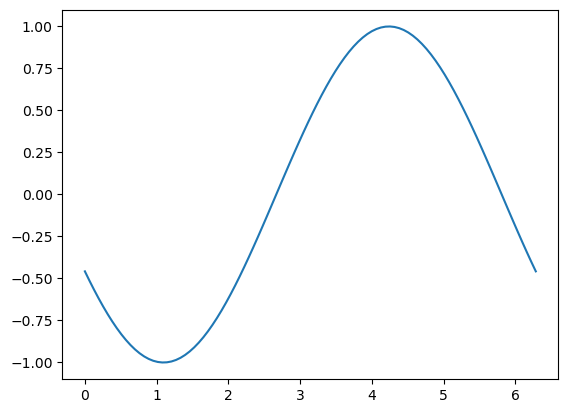

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create a figure and axis
fig, ax = plt.subplots()
x_data = np.linspace(0, 2 * np.pi, 100)
line, = ax.plot(x_data, np.sin(x_data))

# Function to update the plot for each frame
def update(frame):
    line.set_ydata(np.sin(x_data + frame / 10.0))  # Update the sine wave data
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=100, blit=True, interval=100)

# Display the animation in the Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())


C:\Users\jarc5624\AppData\Local\Temp\ipykernel_13152\3724048972.py:32: RuntimeWarning: invalid value encountered in divide
  ux = np.sum(populations * ex, axis=2) / rho
C:\Users\jarc5624\AppData\Local\Temp\ipykernel_13152\3724048972.py:33: RuntimeWarning: invalid value encountered in divide
  uy = np.sum(populations * ey, axis=2) / rho


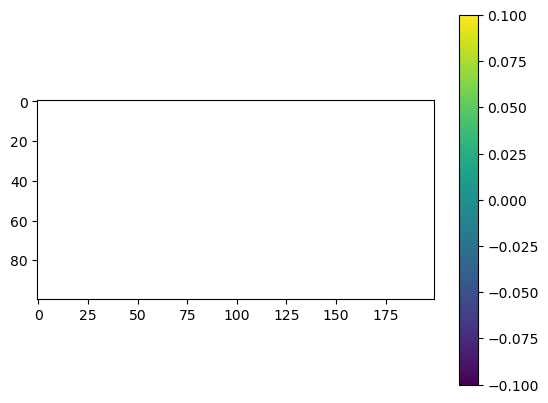

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
width, height = 200, 100  # Size of the simulation grid
viscosity = 0.1  # Viscosity coefficient
density = 1.0  # Initial density

# Lattice velocities (D2Q9 lattice)
ex = np.array([1, 1, 0, -1, -1, -1, 0, 1, 0])
ey = np.array([0, 1, 1, 1, 0, -1, -1, -1, 0])
weights = np.array([1/9, 1/36, 1/9, 1/36, 4/9, 1/36, 1/9, 1/36, 4/9])

# Initialize populations
populations = np.zeros((width, height, 9))

# Initialize the macroscopic variables (density and velocity)
rho = np.ones((width, height)) * density
ux = np.zeros((width, height))
uy = np.zeros((width, height))

# Main time loop
for _ in range(1000):  # Adjust the number of iterations as needed
    # Collision step - LBM
    feq = np.zeros((width, height, 9))
    for k in range(9):
        cu = 3.0 * (ex[k] * ux + ey[k] * uy)
        feq[:, :, k] = weights[k] * rho * (1.0 + cu + 0.5 * cu**2 - 1.5 * (ux**2 + uy**2))

    # Calculate the macroscopic density and velocity from populations
    rho = np.sum(populations, axis=2)
    ux = np.sum(populations * ex, axis=2) / rho
    uy = np.sum(populations * ey, axis=2) / rho

    # Perform the collision step using the calculated macroscopic variables
    populations = (1.0 - 1.0 / viscosity) * populations + 1.0 / viscosity * feq

    # Streaming step
    for k in range(9):
        populations[:, :, k] = np.roll(populations[:, :, k], (ex[k], ey[k]), axis=(0, 1))

    # Boundary conditions (for simplicity, a lid-driven cavity)
    ux[:, -1] = 0.1  # Lid velocity

# Visualization
plt.imshow(np.sqrt(ux**2 + uy**2).T, cmap='viridis')
plt.colorbar()
plt.show()


C:\Users\jarc5624\AppData\Local\Temp\ipykernel_13152\2134787575.py:37: RuntimeWarning: overflow encountered in multiply
  populations = (1.0 - 1.0 / viscosity) * populations + 1.0 / viscosity * feq
C:\Users\jarc5624\AppData\Local\Temp\ipykernel_13152\2134787575.py:28: RuntimeWarning: overflow encountered in multiply
  feq[:, :, k] = weights[k] * rho * (1.0 + cu + 0.5 * cu**2 - 1.5 * (ux**2 + uy**2))
C:\ProgramData\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\jarc5624\AppData\Local\Temp\ipykernel_13152\2134787575.py:33: RuntimeWarning: invalid value encountered in divide
  ux[mask] = np.sum(populations * ex, axis=2)[mask] / rho[mask]
C:\Users\jarc5624\AppData\Local\Temp\ipykernel_13152\2134787575.py:34: RuntimeWarning: invalid value encountered in multiply
  uy[mask] = np.sum(populations * ey, axis=2)[mask] / rho[mask]
C:\Users\jarc5624\AppData\Local\Temp\ipyke

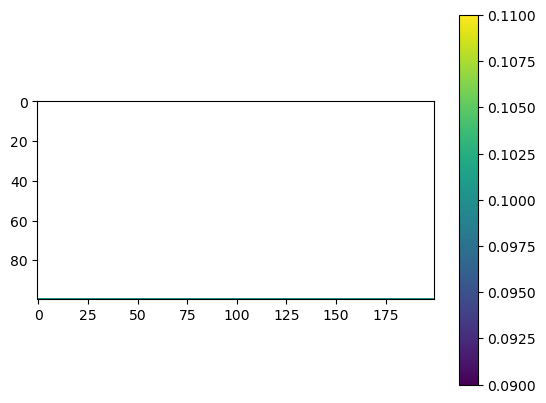

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
width, height = 200, 100  # Size of the simulation grid
viscosity = 0.1  # Viscosity coefficient
density = 1.0  # Initial density

# Lattice velocities (D2Q9 lattice)
ex = np.array([1, 1, 0, -1, -1, -1, 0, 1, 0])
ey = np.array([0, 1, 1, 1, 0, -1, -1, -1, 0])
weights = np.array([1/9, 1/36, 1/9, 1/36, 4/9, 1/36, 1/9, 1/36, 4/9])

# Initialize populations
populations = np.zeros((width, height, 9))

# Initialize the macroscopic variables (density and velocity)
rho = np.ones((width, height)) * density
ux = np.zeros((width, height))
uy = np.zeros((width, height))

# Main time loop
for _ in range(1000):  # Adjust the number of iterations as needed
    # Collision step - LBM
    feq = np.zeros((width, height, 9))
    for k in range(9):
        cu = 3.0 * (ex[k] * ux + ey[k] * uy)
        feq[:, :, k] = weights[k] * rho * (1.0 + cu + 0.5 * cu**2 - 1.5 * (ux**2 + uy**2))

    # Calculate the macroscopic density and velocity from populations
    rho = np.sum(populations, axis=2)
    mask = (rho > 0)  # Add a mask to prevent division by zero
    ux[mask] = np.sum(populations * ex, axis=2)[mask] / rho[mask]
    uy[mask] = np.sum(populations * ey, axis=2)[mask] / rho[mask]

    # Perform the collision step using the calculated macroscopic variables
    populations = (1.0 - 1.0 / viscosity) * populations + 1.0 / viscosity * feq

    # Streaming step
    for k in range(9):
        populations[:, :, k] = np.roll(populations[:, :, k], (ex[k], ey[k]), axis=(0, 1))

    # Boundary conditions (for simplicity, a lid-driven cavity)
    ux[:, -1] = 0.1  # Lid velocity

# Visualization
plt.imshow(np.sqrt(ux**2 + uy**2).T, cmap='viridis')
plt.colorbar()
plt.show()


In [1]:
class FibonacciCalculator:
    def __init__(self):
        self._memo = {}

    def fib(self, n):
        if n in self._memo:
            return self._memo[n]
        if n <= 1:
            result = n
        else:
            result = self.fib(n-1) + self.fib(n-2)
        self._memo[n] = result
        return result

    def create_memento(self):
        return self._memo.copy()

    def restore_from_memento(self, memento):
        self._memo = memento


# Example usage:
calculator = FibonacciCalculator()
# Calculating Fibonacci(5)
print("Fibonacci(5):", calculator.fib(5))

# Creating a memento
memento = calculator.create_memento()

# Calculating Fibonacci(7)
print("Fibonacci(7):", calculator.fib(7))

# Restoring from the memento and recalculating Fibonacci(5)
calculator.restore_from_memento(memento)
print("Fibonacci(5) after restoring from memento:", calculator.fib(5))


Fibonacci(5): 5
Fibonacci(7): 13
Fibonacci(5) after restoring from memento: 5
